In [1]:
import sys
# from python_environment_check import check_packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from os.path import expanduser as ospath
import csv
import re
import locale
from datetime import datetime
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
#import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from IPython.display import display, HTML
display("text/html", "<style>.container { width:550% !important; }</style>")
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
import sys
#from python_environment_check import check_packages
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
from distutils.version import LooseVersion
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import (
    LogisticRegression,
    PassiveAggressiveClassifier,
    Perceptron,
    SGDClassifier,
)
from sklearn.model_selection import train_test_split

import matplotlib.cm as cm

class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)



def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    #x = np.arange(10)
    #ys = [i+x+(i*x)**2 for i in range(10)]
    #colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    
    # setup marker generator and color map
    #https://matplotlib.org/2.0.2/api/markers_api.html#module-matplotlib.markers
    markers = ('o', 's', '^', 'v', '<','p', '*', '+', 'd', 'h','8','x','D','v',',')
    #https://matplotlib.org/stable/gallery/color/named_colors.html
    colors = ('red', 'blue', 'cyan', 'maroon','yellow','lime','violet','peru', 'lightgreen','tomato', 'gray','deeppink','purple','olive','lightcoral')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')        

        
def decision_Perceptron(X,y,mdl,clf): 

    # Convert y to a 1D array using ravel()
    y = y.to_numpy().ravel()


    print('Class labels:', np.unique(y))
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1, stratify=y)
#Y = y.astype(np.int32)
#print('Labels counts in y:', np.bincount(Y[:,0]))
#YTR = y_train.astype(np.int32)
#print('Labels counts in y_train:', np.bincount(YTR[:,0]))
#XTS = y_test.astype(np.int32)
#print('Labels counts in y_test:', np.bincount(XTS[:,0]))
    from sklearn.preprocessing import StandardScaler

#    sc = StandardScaler()
#    sc = MinMaxScaler()
#    sc.fit(X_train)
#    X_train_std = sc.transform(X_train)
#    X_test_std = sc.transform(X_test)
    
    X_train_std = X_train
    X_test_std = X_test

    current_time = datetime.now()
    if mdl == 'SGD':
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )
    if mdl == 'ASGD':
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )
    if mdl == 'Perceptron':        
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )
    if mdl == 'Passive-Aggressive I':
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )        
    if mdl == 'Passive-Aggressive II':
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )        
    if mdl == 'SAG':
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )    
    if mdl == 'ppn':
        from sklearn.linear_model import Perceptron
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )
    if mdl == 'knn':        
        from sklearn.neighbors import KNeighborsClassifier
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )    
    if mdl == 'lrgd':
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )        
        X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
        y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
    if mdl == 'svm':
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )

        
#   Main model running        
        
    classifier = clf
    classifier.fit(X_train, y_train)
 
    y_pred = classifier.predict(X_test_std)
    print('Model: ',mdl,'Misclassified examples: %d' % (y_test != y_pred).sum())
    from sklearn.metrics import accuracy_score
    print('Model: ',mdl,'Accuracy: %.3f' % accuracy_score(y_test, y_pred))
    if mdl == 'ppn':
        print('Accuracy: %.3f' % classifier.score(X_test_std, y_test))
    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    return X_combined_std,y_combined, classifier, current_time


'text/html'

'<style>.container { width:550% !important; }</style>'

In [2]:
df = pd.DataFrame()
df = pd.read_csv('04.elemzett_joined_versenyadatok.temp1.csv',sep=';', encoding='utf-8')

In [3]:
# summarize the number of rows with missing values for each column
for i in range(df.shape[1]):
#    count number of rows with missing values
#    n_miss = df[[i]].isnull().sum()
    n_miss = df.iloc[:, i].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))  
    # summarize the number of unique values in each column
    


> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 0 (0.0%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 0 (0.0%)
> 16, Missing: 0 (0.0%)
> 17, Missing: 0 (0.0%)
> 18, Missing: 0 (0.0%)
> 19, Missing: 0 (0.0%)
> 20, Missing: 0 (0.0%)
> 21, Missing: 0 (0.0%)
> 22, Missing: 0 (0.0%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)
> 28, Missing: 0 (0.0%)
> 29, Missing: 0 (0.0%)
> 30, Missing: 0 (0.0%)
> 31, Missing: 0 (0.0%)
> 32, Missing: 0 (0.0%)
> 33, Missing: 0 (0.0%)
> 34, Missing: 0 (0.0%)
> 35, Missing: 0 (0.0%)
> 36, Missing: 0 (0.0%)
> 37, Missing: 0 (0.0%)
> 38, Missing: 0 (0.0%)
> 39, Missing: 0 (0.0%)
> 40, Missing: 0 (0.0%)
> 41, Missing: 0 (0.0%)
> 

In [4]:
#print("Column names:", df.columns.tolist())
column_dict = {idx: col_name for idx, col_name in enumerate(df.columns)}
print("Column names dictionary:")
print(column_dict)



code_label_dict = dict(zip(df['wind_dir'], df['wind_dirlabel']))
print(code_label_dict)
code_label_dict = dict(zip(df['WLT'], df['WLTlabel']))
print(code_label_dict)
#code_label_dict = dict(zip(df['ivar'], df['ivarlabel']))
#print(code_label_dict)
code_label_dict = dict(zip(df['place'], df['placelabel']))
print(code_label_dict)
#code_label_dict = dict(zip(df['chip_szam'], df['chip_szamlabel']))
#print(code_label_dict)
code_label_dict = dict(zip(df['name'], df['namelabel']))
print(code_label_dict)
code_label_dict = dict(zip(df['who'], df['wholabel']))
print(code_label_dict)
code_label_dict = dict(zip(df['colour'], df['colourlabel']))
print(code_label_dict)

Column names dictionary:
{0: 'when', 1: 'place', 2: 'division', 3: 'who', 4: 'felvezeto', 5: 'nev', 6: 'fajta', 7: 'nem', 8: 'ivar', 9: 'szuletesi_datum', 10: 'chip_szam', 11: 'ulna_hossz', 12: 'ugrasi_magassag', 13: 'ivarlabel', 14: 'chip_szamlabel', 15: 'name', 16: 'running', 17: 'WLT', 18: 'dtime', 19: 'run', 20: 'withwho', 21: 'total', 22: 'hurdless', 23: 'colour', 24: 'dog', 25: 'start', 26: 'colourlabel', 27: 'WLTlabel', 28: 'namelabel', 29: 'wholabel', 30: 'time', 31: 'temp_c', 32: 'wind_kph', 33: 'wind_degree', 34: 'wind_dir', 35: 'will_it_rain', 36: 'chance_of_rain', 37: 'humidity', 38: 'datum', 39: 'datumlabel', 40: 'wind_dirlabel', 41: 'placelabel', 42: 'L_count', 43: 'T_count', 44: 'W_count', 45: 'W_max', 46: 'dogcl', 47: 'wind_kphcl', 48: 'temp_ccl', 49: 'humcl', 50: 'whenlabel', 51: 'Category'}
{12: 'W', 14: 'WSW', 13: 'WNW', 6: 'NW', 5: 'NNW', 2: 'N', 4: 'NNE', 1: 'ESE', 3: 'NE', 0: 'E', 9: 'SSE', 8: 'SE', 11: 'SW', 7: 'S', 10: 'SSW'}
{0: 'L', 2: 'W', 1: 'T'}
{1: 'Herolt

Class labels: [0. 1. 2. 3.]
Model:  SGD  start:  20:44:50.800
Model:  SGD Misclassified examples: 1044
Model:  SGD Accuracy: 0.218


C:\Users\A200129952\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\A200129952\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


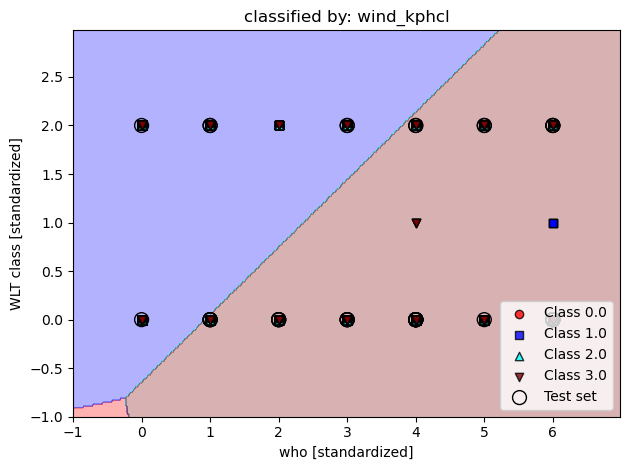

Model:  SGD  delta:  0:00:00.541410
Class labels: [0. 1. 2. 3.]
Model:  ASGD  start:  20:44:51.350
Model:  ASGD Misclassified examples: 799
Model:  ASGD Accuracy: 0.401


C:\Users\A200129952\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


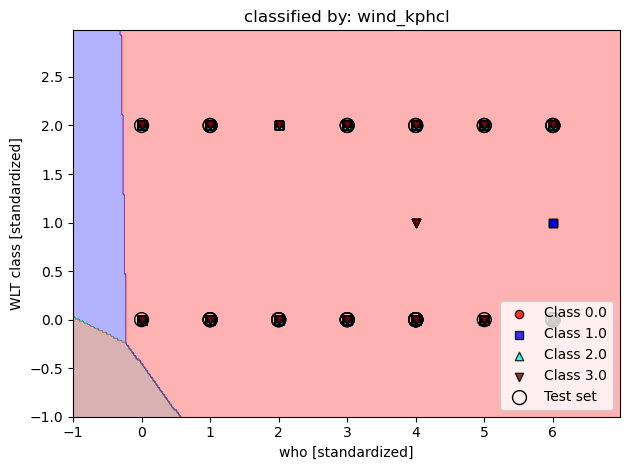

Model:  ASGD  delta:  0:00:00.498271
Class labels: [0. 1. 2. 3.]
Model:  Perceptron  start:  20:44:51.857
Model:  Perceptron Misclassified examples: 1164
Model:  Perceptron Accuracy: 0.128


C:\Users\A200129952\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


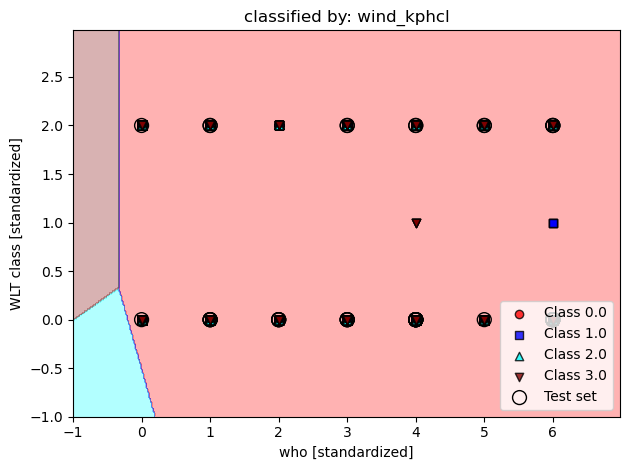

Model:  Perceptron  delta:  0:00:00.442759
Class labels: [0. 1. 2. 3.]
Model:  Passive-Aggressive I  start:  20:44:52.307
Model:  Passive-Aggressive I Misclassified examples: 808
Model:  Passive-Aggressive I Accuracy: 0.395


C:\Users\A200129952\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PassiveAggressiveClassifier was fitted with feature names
  warnings.warn(


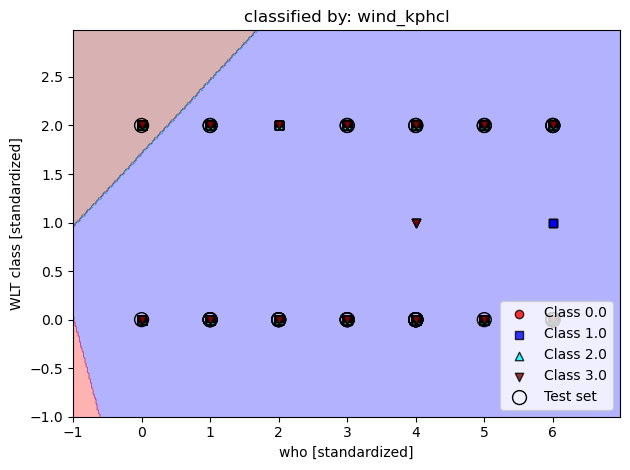

Model:  Passive-Aggressive I  delta:  0:00:00.456801
Class labels: [0. 1. 2. 3.]
Model:  Passive-Aggressive II  start:  20:44:52.772
Model:  Passive-Aggressive II Misclassified examples: 923
Model:  Passive-Aggressive II Accuracy: 0.309


C:\Users\A200129952\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PassiveAggressiveClassifier was fitted with feature names
  warnings.warn(


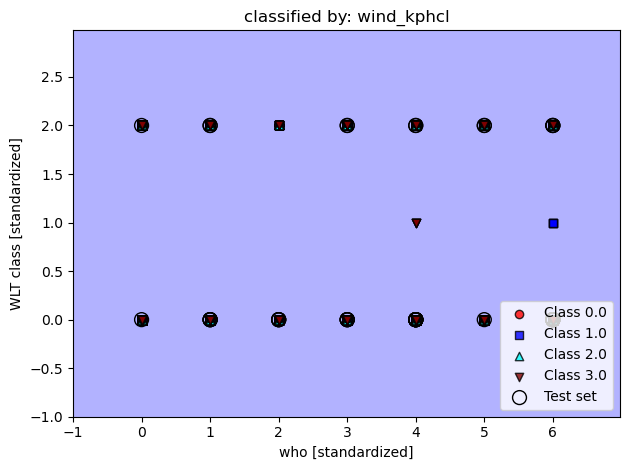

Model:  Passive-Aggressive II  delta:  0:00:00.413714
Class labels: [0. 1. 2. 3.]
Model:  SAG  start:  20:44:53.192
Model:  SAG Misclassified examples: 799
Model:  SAG Accuracy: 0.401


C:\Users\A200129952\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


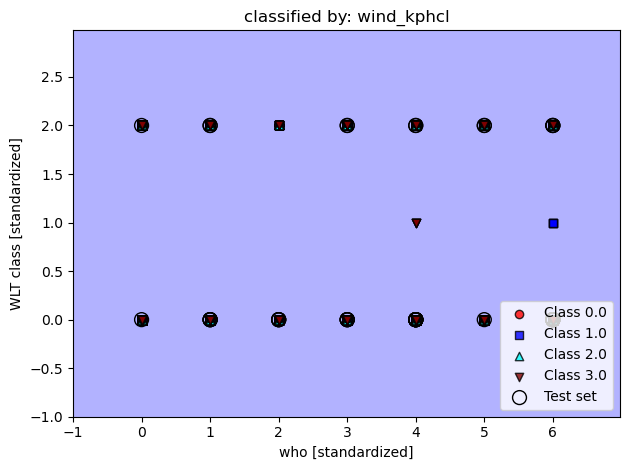

Model:  SAG  delta:  0:00:00.424125
Class labels: [0. 1. 2. 3.]
Model:  forest Misclassified examples: 800
Model:  forest Accuracy: 0.401


C:\Users\A200129952\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


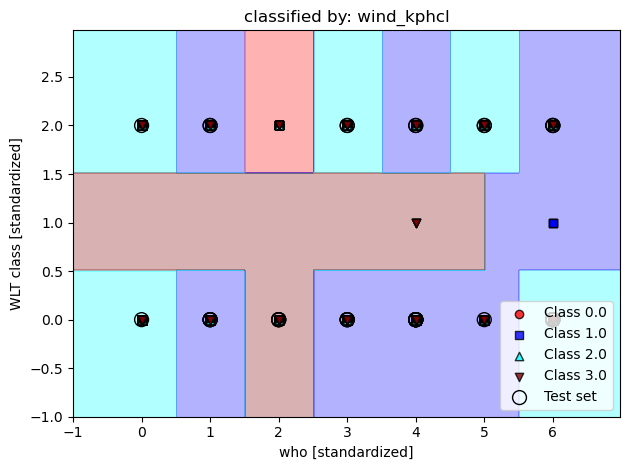

Model:  forest  delta:  0:00:00.671646
Class labels: [0. 1. 2. 3.]
Model:  svm  start:  20:44:54.301
Model:  svm Misclassified examples: 799
Model:  svm Accuracy: 0.401


C:\Users\A200129952\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


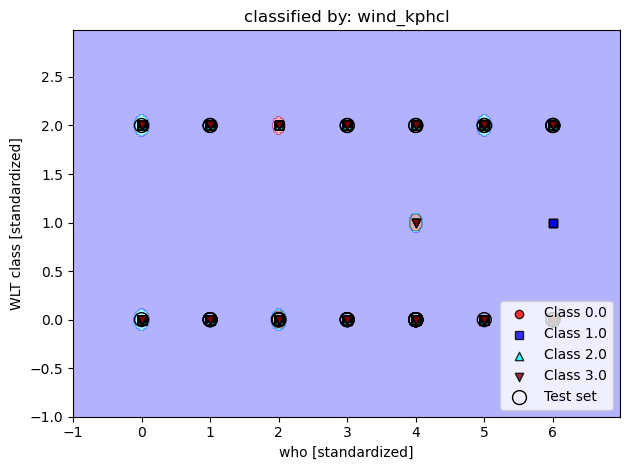

Model:  svm  delta:  0:00:38.042092
Class labels: [0. 1. 2. 3.]
Model:  lrgd  start:  20:45:32.348


C:\Users\A200129952\AppData\Local\Temp\ipykernel_15328\3760062297.py:122: RuntimeWarning: divide by zero encountered in log
  loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0]


Model:  lrgd Misclassified examples: 799
Model:  lrgd Accuracy: 0.401


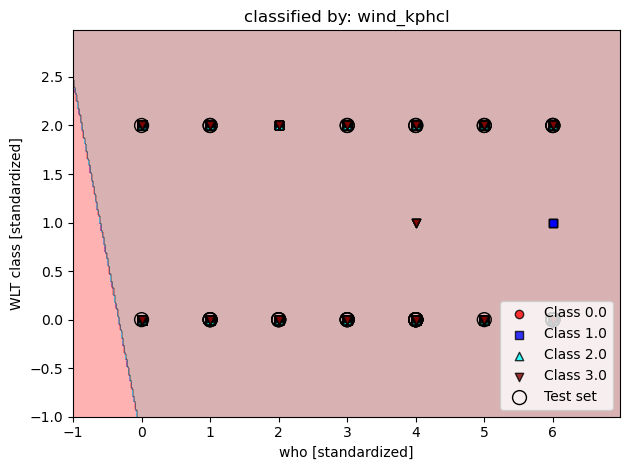

Model:  lrgd  delta:  0:00:01.762515
Class labels: [0. 1. 2. 3.]
Model:  knn  start:  20:45:34.116
Model:  knn Misclassified examples: 847
Model:  knn Accuracy: 0.366


C:\Users\A200129952\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


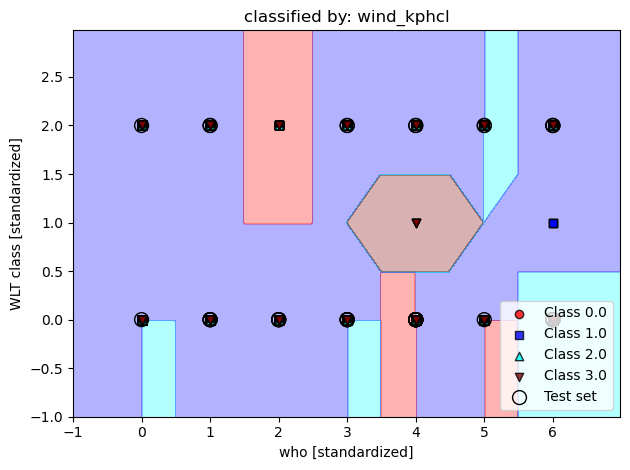

Model:  knn  delta:  0:00:03.720838
Class labels: [0. 1. 2. 3.]
Model:  ppn  start:  20:45:37.842
Model:  ppn Misclassified examples: 1064
Model:  ppn Accuracy: 0.203
Accuracy: 0.203


C:\Users\A200129952\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


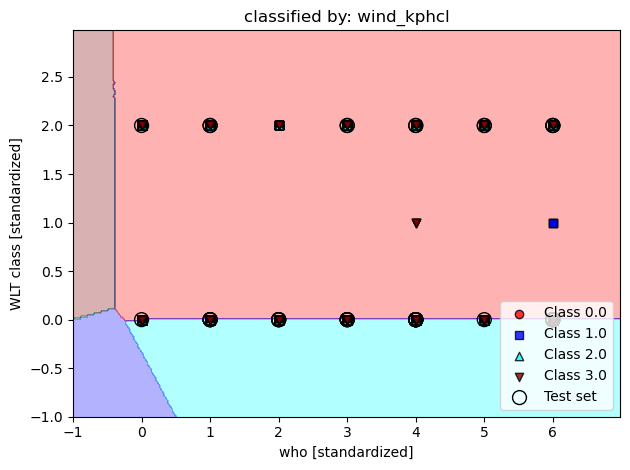

Model:  ppn  delta:  0:00:00.599334


In [17]:
# Number of rounds to fit and evaluate an estimator.
rounds = 10

X = df.iloc[:, [3,17]]  # who, WLT
#y = df.iloc[:, [32]] # wind_kph
y = df['wind_kphcl']

classifiers = [
    ("SGD", SGDClassifier(max_iter=110)),
    ("ASGD", SGDClassifier(max_iter=110, average=True)),
    ("Perceptron", Perceptron(max_iter=110)),
    ("Passive-Aggressive I",PassiveAggressiveClassifier(max_iter=110, loss="hinge", C=1.0, tol=1e-4),),
    ("Passive-Aggressive II",PassiveAggressiveClassifier(max_iter=110, loss="squared_hinge", C=1.0, tol=1e-4),),
    ("SAG",LogisticRegression(max_iter=110, solver="sag", tol=1e-1, C=1.0e4 / X.shape[0]),),
    ("forest", RandomForestClassifier(n_estimators=25,random_state=1,n_jobs=2)),
    ("svm", SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)),
    ("lrgd", LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)),
    ("knn", KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')),
    ("ppn", Perceptron(eta0=0.1, random_state=1)),
]

for mdl, clf in classifiers:
    #print("training %s" % name)
    X_combined_std, y_combined, mdlobj, start_time = decision_Perceptron(X,y,mdl,clf)

    plot_decision_regions(X=X_combined_std, y=y_combined,classifier=mdlobj, test_idx=range(105, 150))
    plt.xlabel('who [standardized]')
    plt.ylabel('WLT class [standardized]')
    plt.legend(loc='lower right')
    plt.title('classified by: wind_kphcl' )

    plt.tight_layout()
    #plt.savefig('figures/03_01.png', dpi=300)
    plt.show()
    delta_time = datetime.now() - start_time
    print('Model: ', mdl, ' delta: ', str(delta_time) )


__(Winners: 2, Loosers: 0, Ties: 1)__   
__Szélerősség nő az osztály  kódjával__  
__általában gyenge szélben (<8,21) jobban teljesítenek a csapatok,__   
__van olyan csapat aki erős szélben rosszabbul teljesít: 'WildRunners Wonders'__

In [18]:
df.to_csv('06.WildRunner_versenyadatok.csv', sep=';', index=False)  